# THE PROBLEM STATEMENT/BUSINESS CASE [REVIEW]

- In this project, we will assume that we own an ice cream business that is highly dependant on the outside air temperature. 
- We will apply simple linear regression to predict the daily revenue in dollars(USD) based on outside air temperature. 
- Dataset:
    - Input (X): Outside Air Temperature
    - Output (Y): Overall daily revenue generated in dollars 
- In simple linear regression, we predict the value of one variable Y based on another variable X.
- X is called the independent variable and Y is called the dependant variable.
- Why simple? Because it examines relationship between two variables only.
- Why linear? when the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.


# IMPORT KEY LIBRARIES/DATASETS AND PREPARE THE DATA FOR TRAINING

In [4]:
# Listing all the packages 
!pip list

Package                              Version
------------------------------------ --------------
ansicolors                           1.1.8
anyio                                4.4.0
archspec                             0.2.3
argon2-cffi                          23.1.0
argon2-cffi-bindings                 21.2.0
arrow                                1.3.0
asttokens                            2.4.1
async-lru                            2.0.4
attrs                                23.2.0
autovizwidget                        0.20.4
awscli                               1.33.13
Babel                                2.14.0
beautifulsoup4                       4.12.3
bleach                               6.1.0
boltons                              23.1.1
boto3                                1.34.131
botocore                             1.34.131
Brotli                               1.1.0
cached-property                      1.5.2
certifi                              2024.6.2
cffi                     

In [5]:
# install seaborn library
!pip install --upgrade Seaborn

# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.8 MB/s eta 0:00:00ta 0:00:01


In [6]:
# read the data using Pandas 
icecream_sales_df = pd.read_csv('IceCreamData.csv')

In [7]:
# View the DataFrame
icecream_sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [8]:
icecream_sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [9]:
icecream_sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [11]:
# Separate the data into input X and output y
X = icecream_sales_df[['Temperature']]
y = icecream_sales_df[['Revenue']]

In [12]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [13]:
y

,Revenue
0,534.799028
1,625.190122
2,660.632289
3,487.706960
4,316.240194
...,...
495,524.746364
496,755.818399
497,306.090719
498,566.217304


In [14]:
# Check out the shape of the input
X.shape

(500, 1)

In [15]:
# Check out the shape of the output
y.shape

(500, 1)

In [16]:
# Convert the datatype to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [17]:
# Only take the numerical variables and scale them
X 

array([[24.566885 ],
       [26.005192 ],
       [27.790554 ],
       [20.595335 ],
       [11.503498 ],
       [14.352514 ],
       [13.70778  ],
       [30.833984 ],
       [ 0.97687  ],
       [31.669464 ],
       [11.455254 ],
       [ 3.6646695],
       [18.811825 ],
       [13.624509 ],
       [39.53991  ],
       [18.48314  ],
       [25.935375 ],
       [42.51528  ],
       [29.589481 ],
       [21.775948 ],
       [25.457836 ],
       [15.214569 ],
       [22.619316 ],
       [16.25872  ],
       [23.881725 ],
       [18.9783   ],
       [15.661465 ],
       [29.185045 ],
       [19.02461  ],
       [35.12015  ],
       [24.183937 ],
       [15.23119  ],
       [ 8.790953 ],
       [18.233229 ],
       [35.628925 ],
       [37.05754  ],
       [22.28455  ],
       [17.517075 ],
       [31.737919 ],
       [17.049738 ],
       [23.003489 ],
       [ 8.755554 ],
       [18.775358 ],
       [14.109661 ],
       [18.633913 ],
       [15.676487 ],
       [20.947914 ],
       [30.63

In [18]:
y

array([[ 534.799  ],
       [ 625.1901 ],
       [ 660.63226],
       [ 487.70697],
       [ 316.2402 ],
       [ 367.94073],
       [ 308.89453],
       [ 696.7166 ],
       [  55.39034],
       [ 737.80084],
       [ 325.9684 ],
       [  71.16016],
       [ 467.44672],
       [ 289.54092],
       [ 905.4776 ],
       [ 469.90903],
       [ 648.21   ],
       [ 921.5083 ],
       [ 649.56116],
       [ 534.62286],
       [ 612.15393],
       [ 353.32562],
       [ 524.23615],
       [ 374.23114],
       [ 523.1246 ],
       [ 473.60434],
       [ 402.45532],
       [ 679.3178 ],
       [ 517.53406],
       [ 809.67206],
       [ 528.38043],
       [ 356.09802],
       [ 237.76392],
       [ 418.13727],
       [ 809.46344],
       [ 870.7659 ],
       [ 550.2785 ],
       [ 405.66144],
       [ 740.93567],
       [ 501.733  ],
       [ 539.688  ],
       [ 242.2362 ],
       [ 421.6215 ],
       [ 358.00284],
       [ 467.63107],
       [ 396.93564],
       [ 500.92508],
       [ 651.

In [29]:
# split the data into training and testing using SkLearn Library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
 - **Split the data into 75% for training and the rest for testing**
 - **Verify that the split was successful**
 - **Did you notice any change in the order of the data? why?**
 - **Add an attribute to disable data shuffling [external research is required]**

# TRAIN A LINEAR LEARNER MODEL USING AWS SAGEMAKER 

In [30]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()

# Let's define the S3 bucket and prefix that we want to use in this session
bucket = 'ml-lab-sagemaker' # bucket need to be created beforehand
prefix = 'simple_linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::588738589118:role/service-role/AmazonSageMaker-ExecutionRole-20241129T190553


In [31]:
X_train.shape

(400, 1)

In [32]:
y_train = y_train[:,0]

In [33]:
y_train.shape

(400,)

In [34]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner (one of many available options!)

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [35]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://ml-lab-sagemaker/simple_linear_learner/train/linear-train-data


In [36]:
X_test.shape

(100, 1)

In [37]:
y_test.shape

(100, 1)

In [38]:
# Make sure that the target label is a vector
y_test = y_test[:,0]


In [39]:
# Code to upload RecordIO data to S3

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [40]:
# Key refers to the name of the file    
key = 'linear-test-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

# Let's print out the testing data location in s3
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://ml-lab-sagemaker/simple_linear_learner/test/linear-test-data


In [41]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://ml-lab-sagemaker/simple_linear_learner/output


In [42]:
# Note that this code leverages the new SageMaker SDK 2.0
# Check this out for the list of changes from AWS SageMaker SDK 1.0 to 2.0: https://sagemaker.readthedocs.io/en/stable/v2.html

# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm that we want to use

# Let's obtain a reference to the linearLearner container image
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session
container = sagemaker.image_uris.retrieve("linear-learner", boto3.Session().region_name)


# If you are using an old version of AWS SageMAker SDK 1.0, you need to use get_image_uri
# from sagemaker.amazon.amazon_estimator import get_image_uri
# container = get_image_uri(boto3.Session().region_name, 'linear-learner')

In [43]:
# Note that this code leverages the new SageMaker SDK 2.0
# Check this for the list of changes from AWS SageMaker SDK 1.0 to 2.0: https://sagemaker.readthedocs.io/en/stable/v2.html


# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 5,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

INFO:sagemaker:Creating training-job with name: linear-learner-2024-12-02-10-51-34-113


2024-12-02 10:51:34 Starting - Starting the training job......
2024-12-02 10:52:09 Starting - Preparing the instances for training...
2024-12-02 10:52:48 Downloading - Downloading input data...
2024-12-02 10:53:14 Downloading - Downloading the training image........
2024-12-02 10:54:35 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[12/02/2024 10:54:48 INFO 140029926844224] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss

# DEPLOY AND TEST TRAINED LINEAR LEARNER MODEL 

In [45]:
# Deploying the model to perform inference 
# serializer: A serializer object is used to encode data for an inference endpoint.
# deserializer: A deserializer object is used to decode data from an inference endpoint.

from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer


linear_regressor = linear.deploy(initial_instance_count = 1,
                                 instance_type = 'ml.m4.xlarge',
                                 serializer = CSVSerializer(),
                                 deserializer = JSONDeserializer())

INFO:sagemaker:Creating model with name: linear-learner-2024-12-02-10-57-33-369
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-12-02-10-57-33-369
INFO:sagemaker:Creating endpoint with name linear-learner-2024-12-02-10-57-33-369


-------!

In [46]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [47]:
result # results are in Json format

{'predictions': [{'score': 701.6041259765625},
  {'score': 589.053466796875},
  {'score': 175.63095092773438},
  {'score': 51.265289306640625},
  {'score': 591.490966796875},
  {'score': 479.0887451171875},
  {'score': 374.5992126464844},
  {'score': 531.7647094726562},
  {'score': 360.16436767578125},
  {'score': 215.6853790283203},
  {'score': 363.99847412109375},
  {'score': 529.4722900390625},
  {'score': 457.0177307128906},
  {'score': 801.896728515625},
  {'score': 524.330810546875},
  {'score': 426.127197265625},
  {'score': 758.48974609375},
  {'score': 665.991943359375},
  {'score': 627.1795654296875},
  {'score': 890.066650390625},
  {'score': 370.3094177246094},
  {'score': 623.6727294921875},
  {'score': 673.5126953125},
  {'score': 486.6947021484375},
  {'score': 590.9539794921875},
  {'score': 576.9205322265625},
  {'score': 587.0947265625},
  {'score': 532.695068359375},
  {'score': 481.0841979980469},
  {'score': 308.6175842285156},
  {'score': 621.7777099609375},
  {'s

In [48]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [49]:
predictions

array([701.60412598, 589.0534668 , 175.63095093,  51.26528931,
       591.4909668 , 479.08874512, 374.59921265, 531.76470947,
       360.16436768, 215.68537903, 363.99847412, 529.47229004,
       457.01773071, 801.89672852, 524.33081055, 426.12719727,
       758.48974609, 665.99194336, 627.17956543, 890.06665039,
       370.30941772, 623.67272949, 673.51269531, 486.69470215,
       590.95397949, 576.92053223, 587.09472656, 532.69506836,
       481.084198  , 308.61758423, 621.77770996, 672.22009277,
       639.87390137, 593.56542969, 416.38183594, 475.35510254,
       454.29248047, 661.15563965, 433.31329346, 645.64416504,
       586.03918457, 430.64239502, 329.62179565, 180.62902832,
       190.15245056, 186.1178894 , 288.7635498 , 571.97375488,
       526.7387085 , 478.03912354, 681.89807129, 495.95617676,
       578.12792969, 628.37683105, 531.72735596, 756.80566406,
       513.02758789, 256.15118408, 258.9296875 , 366.84899902,
       572.39208984, 295.46624756, 636.59533691, 243.88

In [50]:
predictions.shape

(100,)

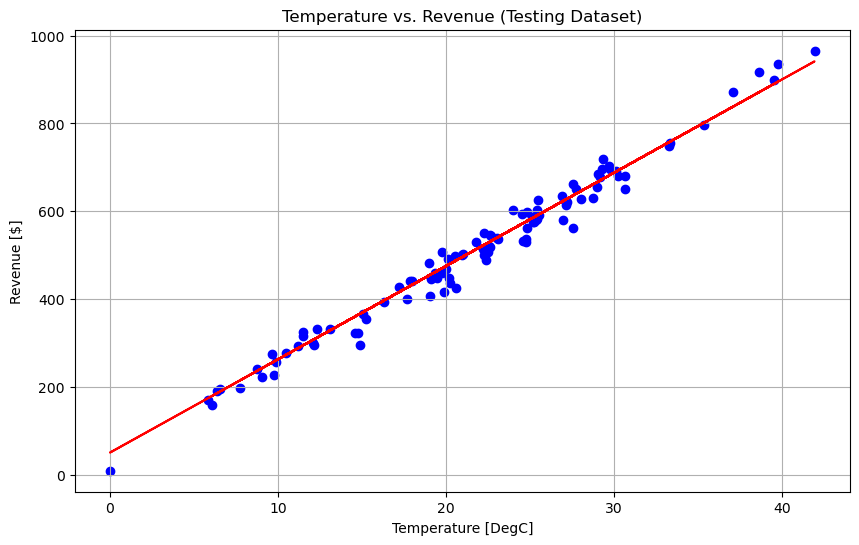

In [51]:
# VISUALIZE TEST SET RESULTS
plt.figure(figsize = (10, 6))
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Temperature [DegC]')
plt.ylabel('Revenue [$]')
plt.title('Temperature vs. Revenue (Testing Dataset)')
plt.grid()

In [52]:
# Testing the model with the following temperatures: 10 degC and 35 degC
temperature = [[10]]
revenue = linear_regressor.predict(temperature)
print(revenue)

temperature = [[35]] 
revenue = linear_regressor.predict(temperature)
print(revenue)

{'predictions': [{'score': 263.54937744140625}]}
{'predictions': [{'score': 794.2596435546875}]}


In [53]:
# Delete the end-point
linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-12-02-10-57-33-369
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-12-02-10-57-33-369


# TRAINING A NEW MODEL WITH 25% TEST DATA AND OPTIMISED COST

In [54]:
# split the data into training and testing(25%) using SkLearn Library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = False)


In [55]:
X_train.shape

(375, 1)

In [56]:
X_test.shape

(125, 1)

In [57]:
y_train.shape

(375, 1)

In [58]:
y_test.shape

(125, 1)

In [59]:
X_train

array([[24.566885 ],
       [26.005192 ],
       [27.790554 ],
       [20.595335 ],
       [11.503498 ],
       [14.352514 ],
       [13.70778  ],
       [30.833984 ],
       [ 0.97687  ],
       [31.669464 ],
       [11.455254 ],
       [ 3.6646695],
       [18.811825 ],
       [13.624509 ],
       [39.53991  ],
       [18.48314  ],
       [25.935375 ],
       [42.51528  ],
       [29.589481 ],
       [21.775948 ],
       [25.457836 ],
       [15.214569 ],
       [22.619316 ],
       [16.25872  ],
       [23.881725 ],
       [18.9783   ],
       [15.661465 ],
       [29.185045 ],
       [19.02461  ],
       [35.12015  ],
       [24.183937 ],
       [15.23119  ],
       [ 8.790953 ],
       [18.233229 ],
       [35.628925 ],
       [37.05754  ],
       [22.28455  ],
       [17.517075 ],
       [31.737919 ],
       [17.049738 ],
       [23.003489 ],
       [ 8.755554 ],
       [18.775358 ],
       [14.109661 ],
       [18.633913 ],
       [15.676487 ],
       [20.947914 ],
       [30.63

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Try to train the model with more epochs and additional number of models**
- **Can you try to reduce the cost of the billable seconds?**

In [60]:
# A Spot offers a lower price compared to an on-Demand instance.
# Amazon EC2 Spot Instances offer spare compute capacity available in the AWS Cloud at ~90% discounts compared to On-Demand prices. 

# train_use_spot_instances (bool): Specifies whether to use SageMaker Managed Spot instances for training.
# max_run (int): Timeout in seconds for training (default: 24 * 60 * 60). After this amount of time Amazon SageMaker terminates the job regardless of its current status.
# max_wait (int): Timeout in seconds waiting for spot training instances (default: None). After this amount of time Amazon SageMaker will stop waiting for Spot instances to become available (default:None).


linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session,
                                       use_spot_instances = True,
                                       max_run = 300,
                                       max_wait = 600)

# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 5,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

INFO:sagemaker:Creating training-job with name: linear-learner-2024-12-02-11-05-57-307


2024-12-02 11:05:57 Starting - Starting the training job...
2024-12-02 11:06:23 Starting - Preparing the instances for training......
2024-12-02 11:07:11 Downloading - Downloading input data...
2024-12-02 11:07:37 Downloading - Downloading the training image.........
2024-12-02 11:09:03 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[12/02/2024 11:09:19 INFO 140064899327808] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'los

In [61]:
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer


linear_regressor = linear.deploy(initial_instance_count = 1,
                                 instance_type = 'ml.m4.xlarge',
                                 serializer = CSVSerializer(),
                                 deserializer = JSONDeserializer())

INFO:sagemaker:Creating model with name: linear-learner-2024-12-02-11-12-03-752
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-12-02-11-12-03-752
INFO:sagemaker:Creating endpoint with name linear-learner-2024-12-02-11-12-03-752


--------!

In [64]:
result = linear_regressor.predict(X_test)

In [65]:
predictions = np.array([r['score'] for r in result['predictions']])


In [66]:
predictions

array([ 672.22009277,  791.30249023,  288.53845215,  605.88378906,
        897.41687012,  484.559021  ,  430.64239502,  440.73907471,
        261.43276978,  583.17028809,  307.80215454,  836.65454102,
        363.99847412,  202.14601135,  859.99560547,  622.81054688,
        315.2010498 ,  266.09118652,  424.33831787,  307.3324585 ,
        696.77062988,  206.98510742,  531.72735596,  646.64587402,
        762.72570801,  565.84985352,  871.29455566,   51.26528931,
        568.15808105,  606.78857422,  163.93522644,  433.31329346,
        708.60473633,  682.14208984,  744.37145996,  499.80300903,
        445.08706665,  360.16436768,  937.90356445,  626.9317627 ,
        476.18127441,  487.78536987,  635.39990234,  692.95983887,
        511.49502563,  476.89883423,  418.49984741,  416.38183594,
        803.69665527,  457.01773071,  453.59713745,  605.79675293,
        475.4697876 ,  639.74731445,  497.62225342,  590.05163574,
        563.15856934,  637.14953613,  237.1413269 ,  635.93725

In [67]:
predictions.shape

(125,)

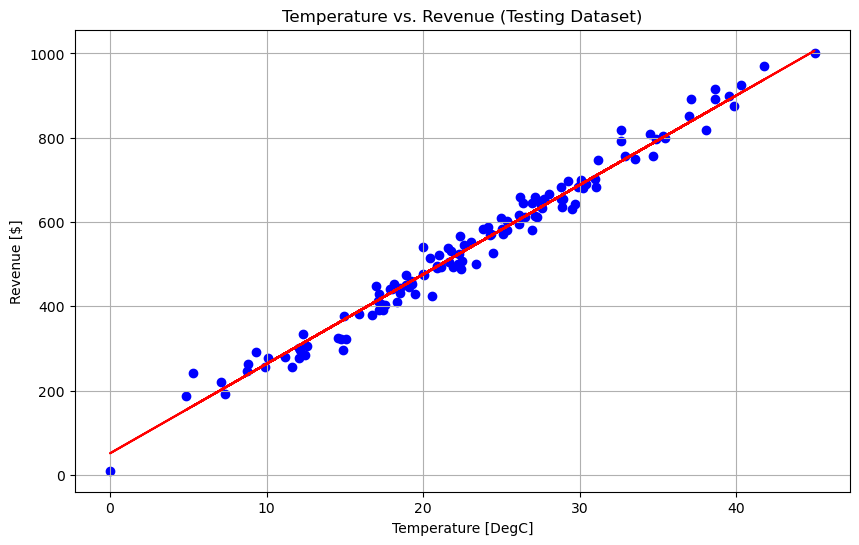

In [68]:
plt.figure(figsize = (10, 6))
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Temperature [DegC]')
plt.ylabel('Revenue [$]')
plt.title('Temperature vs. Revenue (Testing Dataset)')
plt.grid()

In [69]:
temperature = [[10]]
revenue = linear_regressor.predict(temperature)
print(revenue)

temperature = [[35]] 
revenue = linear_regressor.predict(temperature)
print(revenue)


{'predictions': [{'score': 263.54937744140625}]}
{'predictions': [{'score': 794.2596435546875}]}


In [70]:
# Delete the end-point
linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-12-02-11-12-03-752
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-12-02-11-12-03-752


# TRAINING A MODEL WITH MORE EPOCHS AND ADDITIONAL NUMBER OF MODELS

In [71]:
# More epochs and additional number of models
linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 10,
                           num_models = 64,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

INFO:sagemaker:Creating training-job with name: linear-learner-2024-12-02-11-19-06-438


2024-12-02 11:19:06 Starting - Starting the training job......
2024-12-02 11:19:42 Starting - Preparing the instances for training...
2024-12-02 11:20:37 Downloading - Downloading input data...
2024-12-02 11:21:02 Downloading - Downloading the training image.........
2024-12-02 11:22:33 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[12/02/2024 11:22:45 INFO 140318208165696] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'l

In [72]:
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer


linear_regressor = linear.deploy(initial_instance_count = 1,
                                 instance_type = 'ml.m4.xlarge',
                                 serializer = CSVSerializer(),
                                 deserializer = JSONDeserializer())

INFO:sagemaker:Creating model with name: linear-learner-2024-12-02-11-24-28-800
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-12-02-11-24-28-800
INFO:sagemaker:Creating endpoint with name linear-learner-2024-12-02-11-24-28-800


-------!

In [73]:
result = linear_regressor.predict(X_test)

In [74]:
predictions = np.array([r['score'] for r in result['predictions']])

In [75]:
predictions

array([ 672.24517822,  791.53607178,  287.89169312,  605.79278564,
        897.83630371,  484.25552368,  430.24447632,  440.35882568,
        260.73855591,  583.03942871,  307.18914795,  836.96759033,
        363.4838562 ,  201.34799194,  860.34954834,  622.74914551,
        314.60101318,  265.40515137,  423.92935181,  306.71859741,
        696.83868408,  206.19555664,  531.50646973,  646.62615967,
        762.90924072,  565.68865967,  871.66833496,   50.20306396,
        568.00091553,  606.69909668,  163.07029724,  432.92004395,
        708.69360352,  682.18457031,  744.52294922,  499.52618408,
        444.71444702,  359.64303589,  938.39385986,  626.87756348,
        475.86309814,  487.48751831,  635.36053467,  693.02124023,
        511.23867798,  476.58190918,  418.08068848,  415.95895386,
        803.9519043 ,  456.66601562,  453.2394104 ,  605.70550537,
        475.15036011,  639.71557617,  497.34164429,  589.93280029,
        562.99267578,  637.11322021,  236.40458679,  635.89886

In [76]:
predictions.shape

(125,)

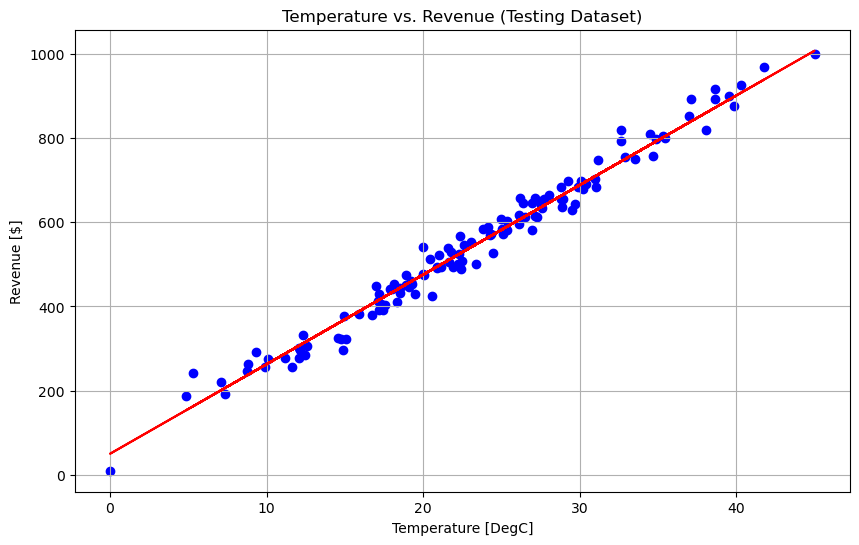

In [77]:
plt.figure(figsize = (10, 6))
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Temperature [DegC]')
plt.ylabel('Revenue [$]')
plt.title('Temperature vs. Revenue (Testing Dataset)')
plt.grid()

In [78]:
temperature = [[10]]
revenue = linear_regressor.predict(temperature)
print(revenue)

temperature = [[35]] 
revenue = linear_regressor.predict(temperature)
print(revenue)

{'predictions': [{'score': 262.85888671875}]}
{'predictions': [{'score': 794.4984130859375}]}


In [79]:
linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-12-02-11-24-28-800
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-12-02-11-24-28-800
